In [7]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [16]:
#define state
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [5]:
def bmi_calculator(state:BMIState)-> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight /(height**2)
    state['bmi'] = round(bmi,2)
    return state

In [23]:
def label_bmi(state:BMIState)-> BMIState:
    bmi = state['bmi']
    if bmi<18.5:
        state['category'] = 'underweight'
        
    elif bmi<24.9:
        state['category'] = 'healthy'
        
    elif bmi<29.9:
        state['category'] = 'overweight'
        
    else:
        state['category'] = 'obesity'
    
    return state


In [25]:
#define graph
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node('bmi_calculator',bmi_calculator)
graph.add_node('label_bmi',label_bmi)

#add edges to your graph
graph.add_edge(START,'bmi_calculator')
graph.add_edge('bmi_calculator','label_bmi')
graph.add_edge('label_bmi', END)

#compile the graph
workflow = graph.compile()


In [31]:
#execute the graph
initial_state = {'weight_kg':89,'height_m':1.9}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 89, 'height_m': 1.9, 'bmi': 24.65, 'category': 'healthy'}


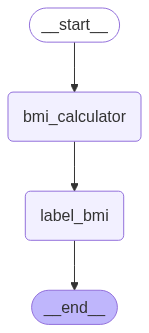

In [32]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())